In [0]:
 import pandas as pd
df=pd.read_csv("Reviews.csv",error_bad_lines=False)

In [2]:
df.shape

(27887, 11)

In [3]:
df.head(5)

,ASIN,PRODUCT_NAME,BRAND,USER_ID,RATING,TITLE,DATE,REVIEW_TEXT,HELPFUL,NOT VERIFIED,VERIFIED
0,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AG7JMYAPDUE4SCI5FMNT...,4.0,Really disappointed,2019-05-19,Everything is best except the thing that one p...,2565.0,0.0,1.0
1,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AHO3NHGGF3KZBGXB2CFE...,1.0,Disappointed with the quality,2019-05-22,\xa0Do watch the video. M very disappointed wi...,9225.0,0.0,1.0
2,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AENJE4O24BU5FNJQUUO7...,5.0,*True flagship*,2019-05-19,Worth every buck.Finally one plus has involved...,929.0,0.0,1.0
3,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AE3KHTLYMCRYOQF2LGZ6...,5.0,Bang for the bucks.,2019-05-19,"Awesome device, and hats off to amazon for suc...",953.0,0.0,1.0
4,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AHRG5WTKZ7WEIUAPVYHG...,1.0,Waste of money,2019-05-19,Waste of money this time one plus 7 pro heavy ...,4093.0,0.0,1.0


In [0]:
S=df["BRAND"].value_counts()

In [5]:
S.isnull().sum()

0

In [0]:
S=S[:5]

#Exploratory Data Analysis

This plot is about the top 5 brands of which, the products are purchased the most by customers on Amazon.The most purchased brands are Infinity>Ant>Mi>SupCares>Cooler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, "Count of Product's Brand")

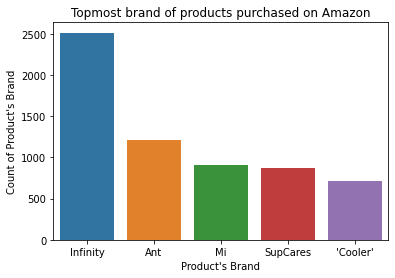

In [7]:
import seaborn as sns
ax=sns.barplot(S.index,S.values)
ax.set_title("Topmost brand of products purchased on Amazon")
ax.set_xlabel("Product's Brand")
ax.set_ylabel("Count of Product's Brand")

In [0]:
S=df["RATING"].value_counts()

In [9]:
df["RATING"].isnull().sum()

0

This plot shows the distribution of ratings of each of the products. The top 2 ratings which are given more frequently are 4 and 5 so we could interpret that most of the products on Amazon are of good quality and the customers had a good experience with it.



Text(0, 0.5, 'Count of ratings')

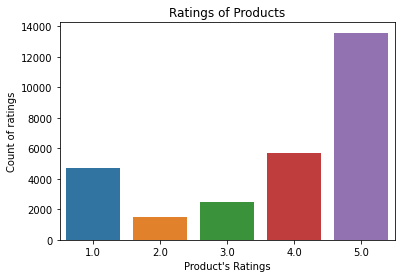

In [10]:
ax=sns.barplot(S.index,S.values)
ax.set_title("Ratings of Products")
ax.set_xlabel("Product's Ratings")
ax.set_ylabel("Count of ratings")

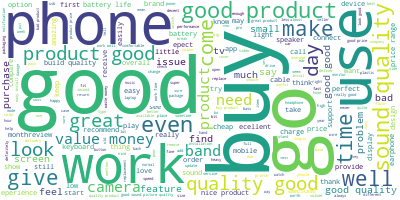

In [74]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['data_lemmatized'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

#Data Cleaning

In [11]:
# Load the regular expression library
import re
# Remove punctuation
df['text_processed'] = df['REVIEW_TEXT'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['text_processed'] = df['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['text_processed'].head()

0    everything is best except the thing that one p...
1    \xa0do watch the video m very disappointed wit...
2    worth every buckfinally one plus has involved ...
3    awesome device and hats off to amazon for such...
4    waste of money this time one plus 7 pro heavy ...
Name: text_processed, dtype: object

In [12]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = df.text_processed.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['everything', 'is', 'best', 'except', 'the', 'thing', 'that', 'one', 'plus', 'hasnt', 'provided', 'headphones', 'with', 'handsetn', 'even', 'cleaning', 'cloth', 'is', 'not', 'thereonly', 'one', 'transparent', 'cover', 'case', 'is', 'availablephone', 'doesn', 'have', 'headphones', 'jack', 'hence', 'it', 'should', 'have', 'provided', 'headphonesmine', 'is', 'mirror', 'black']]


In [13]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [14]:
# NLTK Stop words
 import nltk
 nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1]) 

[['good', 'the', 'provide', 'headphone', 'handsetn', 'even', 'thereonly', 'transparent', 'cover', 'case', 'availablephone', 'hence', 'provide']]


In [0]:
z=[]
for x,y in enumerate(data_lemmatized):
  data_lemmatized1 = ' '.join(x for x in y)
  z.append([x,data_lemmatized1])


In [0]:
df1=pd.DataFrame(z,columns=("Sr No.","data_lemmatized"))

In [22]:
df1.head()

,Sr No.,data_lemmatized
0,0,good the provide headphone handsetn even there...
1,1,watch video disappointed product
2,2,worth buckfinally involve present better shape...
3,3,awesome device hat amazon speedy deliveryi ord...
4,4,waste money time pro heavy weight disply also ...


In [0]:
frames=[df,df1]

In [0]:
df=pd.concat(frames,axis=1)

In [25]:
df.head()

,ASIN,PRODUCT_NAME,BRAND,USER_ID,RATING,TITLE,DATE,REVIEW_TEXT,HELPFUL,NOT VERIFIED,VERIFIED,text_processed,Sr No.,data_lemmatized
0,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AG7JMYAPDUE4SCI5FMNT...,4.0,Really disappointed,2019-05-19,Everything is best except the thing that one p...,2565.0,0.0,1.0,everything is best except the thing that one p...,0,good the provide headphone handsetn even there...
1,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AHO3NHGGF3KZBGXB2CFE...,1.0,Disappointed with the quality,2019-05-22,\xa0Do watch the video. M very disappointed wi...,9225.0,0.0,1.0,\xa0do watch the video m very disappointed wit...,1,watch video disappointed product
2,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AENJE4O24BU5FNJQUUO7...,5.0,*True flagship*,2019-05-19,Worth every buck.Finally one plus has involved...,929.0,0.0,1.0,worth every buckfinally one plus has involved ...,2,worth buckfinally involve present better shape...
3,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AE3KHTLYMCRYOQF2LGZ6...,5.0,Bang for the bucks.,2019-05-19,"Awesome device, and hats off to amazon for suc...",953.0,0.0,1.0,awesome device and hats off to amazon for such...,3,awesome device hat amazon speedy deliveryi ord...
4,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AHRG5WTKZ7WEIUAPVYHG...,1.0,Waste of money,2019-05-19,Waste of money this time one plus 7 pro heavy ...,4093.0,0.0,1.0,waste of money this time one plus 7 pro heavy ...,4,waste money time pro heavy weight disply also ...


***Getting the top 5 positive reviews and top 6 negative reviews***

In [0]:
from textblob import TextBlob
df["polarity"] = df["text_processed"].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df["text_processed"].astype(str).apply(len)
df['word_count'] = df["text_processed"].apply(lambda x: len(str(x).split()))

In [27]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['text_processed']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

perfectly matches with my aspire interior
best battery backup
perfect
'best product with best price'
best budget fitness band if you are looking for a band then this is the best band


In [28]:
print('6 reviews with the most negative polarity: \n')
cl = df.loc[df.polarity == -1, ['text_processed']].sample(6).values
for c in cl:
    print(c[0])

6 reviews with the most negative polarity: 

this is a pathetic charger the owners are just trying to mint money i had an issue with its side spring that broke in 2 days the seller said it cannot be changed as it's not a manufacturing defect the quality is worst
worst product chiller qualiti it's damaged in just 2 days
worst product as it was having an error in some holes ie from 1-5 number holes
i don't got the memory card and camera bag  i got the camera body and one lens onlyi also did not get the carry case worst experience with product purchase
this is worst product dont buy amazon customer support team worst and they don't support after buying amazon selling duplicate product
very worst


In [0]:
from plotly.offline import iplot,init_notebook_mode

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
  <script src="/static/components/requirejs/require.js"></script>
  <script>
  requirejs.config({
    paths:{
      base:'/static/base',
      plotly:'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
    },
  });
  </script>
    '''))

In [31]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [32]:
import plotly
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [33]:
df['RATING'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [34]:
df['HELPFUL'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [35]:
df.head()

,ASIN,PRODUCT_NAME,BRAND,USER_ID,RATING,TITLE,DATE,REVIEW_TEXT,HELPFUL,NOT VERIFIED,VERIFIED,text_processed,Sr No.,data_lemmatized,polarity,review_len,word_count
0,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AG7JMYAPDUE4SCI5FMNT...,4.0,Really disappointed,2019-05-19,Everything is best except the thing that one p...,2565.0,0.0,1.0,everything is best except the thing that one p...,0,good the provide headphone handsetn even there...,0.416667,264,40
1,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AHO3NHGGF3KZBGXB2CFE...,1.0,Disappointed with the quality,2019-05-22,\xa0Do watch the video. M very disappointed wi...,9225.0,0.0,1.0,\xa0do watch the video m very disappointed wit...,1,watch video disappointed product,-0.975000,59,10
2,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AENJE4O24BU5FNJQUUO7...,5.0,*True flagship*,2019-05-19,Worth every buck.Finally one plus has involved...,929.0,0.0,1.0,worth every buckfinally one plus has involved ...,2,worth buckfinally involve present better shape...,0.580000,193,30
3,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AE3KHTLYMCRYOQF2LGZ6...,5.0,Bang for the bucks.,2019-05-19,"Awesome device, and hats off to amazon for suc...",953.0,0.0,1.0,awesome device and hats off to amazon for such...,3,awesome device hat amazon speedy deliveryi ord...,0.329167,348,67
4,B07HGJK535,"OnePlus 7 Pro (Nebula Blue, 8GB RAM, Fluid AMO...",OnePlus,/gp/profile/amzn1.account.AHRG5WTKZ7WEIUAPVYHG...,1.0,Waste of money,2019-05-19,Waste of money this time one plus 7 pro heavy ...,4093.0,0.0,1.0,waste of money this time one plus 7 pro heavy ...,4,waste money time pro heavy weight disply also ...,-0.200000,248,45


#LDA

***LDA is a “generative statistical model” that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. So this is categorized as unsupervised learning.<br>LDA helps for topic modeling.Topic modeling looks to automatically	discover the hidden thematic structure in a	large	corpus	of	text	documents***

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

# NMF is able to use tf-idf
#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
#tfidf = tfidf_vectorizer.fit_transform(documents)
#tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features,ngram_range=(1,2), stop_words='english')
tf = tf_vectorizer.fit_transform(df["data_lemmatized"])
tf_feature_names = tf_vectorizer.get_feature_names()

In [0]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 20

# Run NMF
#nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tf)

In [0]:
import pickle
pkl_filename="LDA.pkl"
with open(pkl_filename,'wb') as file:
  pickle.dump(lda,file)

In [0]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20

In [40]:
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
quality good excellent product good quality quality good build build quality quality product excellent product product quality super low material low quality fantastic audio quality excellent good build quality nice
Topic 1:
tv cable high connect provide usb support power device totally type lead fully satisfied port satisfy pc output projector connection
Topic 2:
product good good product product good return receive delivery deliver service original happy send buy customer amazon fake product work day order pathetic
Topic 3:
easy recommend install item waste receive horn easy install installation apply waste money useful instal add pack defective learn paste hole reasonable
Topic 4:
sound quality sound quality bass music speaker ear volume good sound loud clear sound good low hear play listen high control clarity voice
Topic 5:
fit earphone great use perfectly mobile great product place grip ear black hold look stick come temperature lose note pain finish
Topic 6:
phone purch

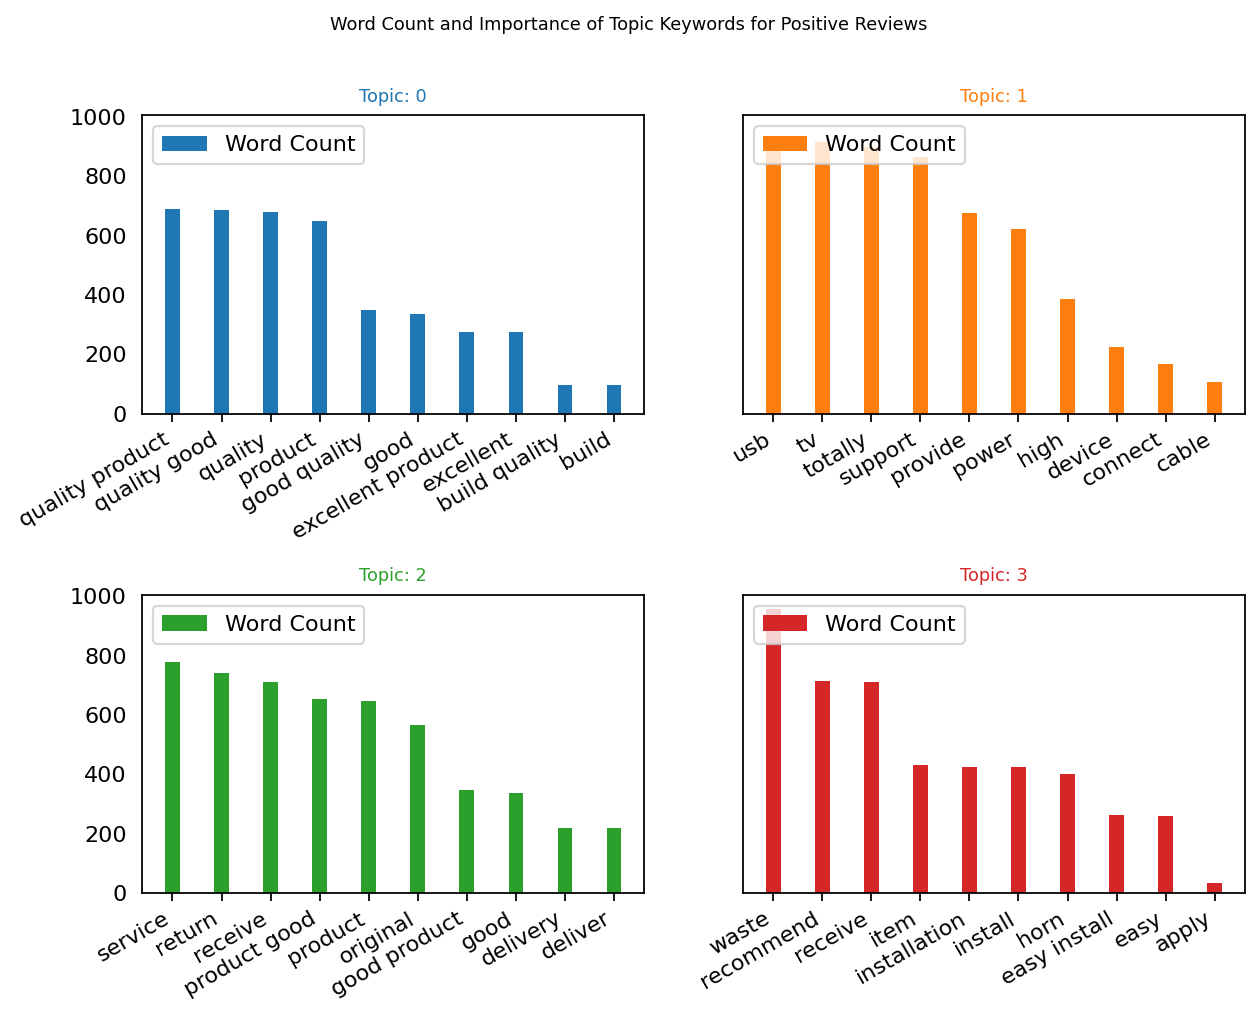

In [41]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from collections import Counter
counter = Counter(data_lemmatized1)
out = []
for topic_idx, topic in enumerate(lda.components_):
    for i in topic.argsort()[:-10 - 1:-1]:
        out.append([tf_feature_names[i], topic_idx, i, counter[tf_feature_names[i]]])


dataframe = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
dataframe = dataframe.sort_values(by = ['importance'], ascending = False)

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="importance", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.3, label='Word Count')
    #ax_twin = ax.twinx()
    #ax_twin.bar(x='word', height="importance", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    #ax.set_ylabel('Word Count', color=cols[i])
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=8)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataframe.loc[dataframe.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); 
    #ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords for Positive Reviews', fontsize=8, y=1.05)    
plt.show()

***For a good LDA model, it should have less log likelihood i.e. more negative the log likelihood is, better the model.<br>
For a good LDA model, perplexity should be as high as possible***

In [42]:
print("Log likelihood: ", lda.score(tf))

Log likelihood:  -1878318.568957163


In [43]:
print("Perplexity: ", lda.perplexity(tf))

Perplexity:  486.10900767362614


#HyperParameter Tuning for LDA

***Due to limited computing resources, the hyperparameters tuning process considers only a few hyperparameter's values***

In [73]:
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [10,15,20,25], 'learning_decay': [.5,.7]}

# Init the model
ldaTune = LatentDirichletAllocation()

# Init Grid Search class
model = GridSearchCV(ldaTune, search_params)

model.fit(tf)
best_lda_model = model.best_estimator_
print("Best model's params: ", model.best_params_)
print("Best log likelihood score: ", model.best_score_)
print("Model perplexity: ", best_lda_model.perplexity(tf))

Best model's params:  {'learning_decay': 0.5, 'n_components': 10}
Best log likelihood score:  -389100.84107894666
Model perplexity:  402.26733873182286


In [0]:
df['RATING']=df['RATING'].apply(lambda x: 1 if int(x)>3 else 0)

In [46]:
df["RATING"].value_counts()

1    19257
0     8630
Name: RATING, dtype: int64

In [0]:
y = df['RATING'].values
X = df['data_lemmatized'].values

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Analysing the data

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

(16732,) (16732,) (11155,) (11155,)
charge light indicator small see full charge charge continue overall power beckup excellent
1
excellent
1


In [49]:
import numpy as np
training_labels = set(y_train)
print(training_labels)
training_category_dist = np.unique(y_train, return_counts = True)
print(training_category_dist)

{0, 1}
(array([0, 1]), array([ 5163, 11569]))


There are almost 2 times more reviews as positive compared to negative reviews when 2.5 point was use therefore we used 3 to make the data much more balanced. Still number of positive reviews are greater. 

In [0]:
# Vectorization
# Bigram boolean vectorizer, set minimum document frequency to 2
bigram_bool_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english',\
                                ngram_range = (1, 2))
#bigram_bool_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english',\
                             #   ngram_range = (1, 1)) #86 percent
#bigram_bool_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')

In [51]:
# Vectorizing the training data

# The vectorizer can do "fit" and "transform"
# fit is a process to collect unique tokens into the vocabulary
# transform is a process to convert each document to vector based on the vocabulary
# These two processes can be done together using fit_transform(), or used individually: fit() or transform()

# fit vocabulary in training documents and transform the training documents into vectors
X_train_vec = bigram_bool_vectorizer.fit_transform(X_train)

# check the content of a document vector
print(X_train_vec.shape)
#print(X_train_vec[0].toarray())

(16732, 28474)


In [52]:
# Vectorizing the testing data

# use the vocabulary constructed from the training data to vectorize the test data. 
# Therefore, use "transform" only, not "fit_transform", 
# otherwise "fit" would generate a new vocabulary from the test data

X_test_vec = bigram_bool_vectorizer.transform(X_test)

# print out #examples and #features in the test set
print(X_test_vec.shape)

(11155, 28474)


In [53]:
# Applying Multinomial Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
# initialize the MNB model
nb_clf= MultinomialNB()

# use the training data to train the MNB model
nb_clf.fit(X_train_vec,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Print Most informative and least informative features

# This is a function I found from stackexchange, and adapted a little bit
# The purpose is to print the top and bottom features nicely
# https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

# You can find many useful scripts from stackexchange or GitHub
# Most tasks are not so unique, so someone in this world might have done something similar and shared their code

def show_most_and_least_informative_features(vectorizer, clf, class_idx=0, n=10):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[class_idx], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[-n:])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [55]:
# Getting most and least informative words. 
show_most_and_least_informative_features(bigram_bool_vectorizer, nb_clf, class_idx=0, n=10)

	-12.3513	able contact   		-5.2772	nice           
	-12.3513	able handle    		-5.2612	work           
	-12.3513	able reduce    		-5.2053	great          
	-12.3513	able resolve   		-5.0747	use            
	-12.3513	able switch    		-5.0706	buy            
	-12.3513	able type      		-4.9188	price          
	-12.3513	able visit     		-4.8332	sound          
	-12.3513	abroad return  		-4.3277	quality        
	-12.3513	absolute waste 		-4.0470	product        
	-12.3513	absolutely change		-3.4782	good           


In [56]:
# Predicting and getting accuracy
nb_clf.score(X_test_vec,y_test)

0.8303899596593456

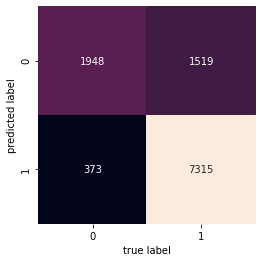

In [57]:
# print confusion matrix (row: ground truth; col: prediction)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
mat = confusion_matrix(y_pred, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1], yticklabels=[0, 1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67      3467
           1       0.83      0.95      0.89      7688

    accuracy                           0.83     11155
   macro avg       0.83      0.76      0.78     11155
weighted avg       0.83      0.83      0.82     11155



#Pre-processing for LSTM

In [59]:
def print_plot(index):
    example = df[df.index == index][['data_lemmatized', 'BRAND']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])
print_plot(10)

get phone yesterday day experience be give short review go thing tell work thing display smooth butter think good thing phone day really really awesome display say display vivid speed hz display opening gaming smoothly build quality great feel solid way handed device slightly heavy side warp charge yesterday night start charge battery blaze fastnow let talk mediocre stuff camera say colour slightly shift know poco capture well image automatic mode good traditional camera weakness front camera good mind_blowing crazy tend crop much front camera portrait hope implement video recordingall say good phone value money market competitive may asus redmi new launch wait month compare thingsbut display choose phone upcoming one best think note display champion talk storage cause everyday usage see much differenceand sorry poor
Product: OnePlus


In [0]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['data_lemmatized'] = df['data_lemmatized'].apply(clean_text)
df['data_lemmatized'] = df['data_lemmatized'].str.replace('\d+', '')

In [61]:
print_plot(10)

get phone yesterday day eperience give short review go thing tell work thing display smooth butter think good thing phone day really really awesome display say display vivid speed hz display opening gaming smoothly build quality great feel solid way handed device slightly heavy side warp charge yesterday night start charge battery blaze fastnow let talk mediocre stuff camera say colour slightly shift know poco capture well image automatic mode good traditional camera weakness front camera good mind_blowing crazy tend crop much front camera portrait hope implement video recordingall say good phone value money market competitive may asus redmi new launch wait month compare thingsbut display choose phone upcoming one best think note display champion talk storage cause everyday usage see much differenceand sorry poor
Product: OnePlus


In [0]:
x=pd.DataFrame(df["BRAND"].value_counts()[:10])

In [63]:
x.rename(columns={"BRAND": "Count"})

,Count
Infinity,2512
Ant,1215
Mi,904
SupCares,875
'Cooler',719
'Motorola',663
'SanDisk',603
'AmazonBasics',585
Amazon,582
POPIO,517


In [0]:
x.index.name = 'BRANDS'
x.reset_index(inplace=True)

In [0]:
df.rename(columns={"BRAND":"BRANDS"},inplace=True)

In [0]:
result=df.merge(x,on="BRANDS",how="inner")

In [67]:
result.head()

,ASIN,PRODUCT_NAME,BRANDS,USER_ID,RATING,TITLE,DATE,REVIEW_TEXT,HELPFUL,NOT VERIFIED,VERIFIED,text_processed,Sr No.,data_lemmatized,polarity,review_len,word_count,BRAND
0,B07XM92NHM,Mi 10000mAH Li-Polymer Power Bank 2i (Blue) wi...,Mi,/gp/profile/amzn1.account.AGDPPPFPW3GSNQHEK3CN...,0,Mi cheats you blatantly. #ChorCompany,2018-03-11,The power bank worked well for less than 3 mon...,6349.0,0.0,1.0,the power bank worked well for less than 3 mon...,390,work well less month stop charge altogether ca...,0.006905,755,145,904
1,B07XM92NHM,Mi 10000mAH Li-Polymer Power Bank 2i (Blue) wi...,Mi,/gp/profile/amzn1.account.AFH7QDAPRMBUHD5D5IZW...,1,"Review after 7 days use""",2018-10-28,Procs -1. Good material2. Good backup / batter...,375.0,0.0,1.0,procs -1 good material2 good backup / battery ...,391,battery life ecellent build quality etra slim ...,0.271875,389,68,904
2,B07XM92NHM,Mi 10000mAH Li-Polymer Power Bank 2i (Blue) wi...,Mi,/gp/profile/amzn1.account.AEY4P26ROSZYPFZPLECA...,1,Worth Purchasing! It comes with good efficiency,2018-09-29,I am using it since 6 months and trust me the...,382.0,0.0,1.0,i am using it since 6 months and trust me the...,392,use month trust power hold capacity particular...,0.143333,435,88,904
3,B07XM92NHM,Mi 10000mAH Li-Polymer Power Bank 2i (Blue) wi...,Mi,/gp/profile/amzn1.account.AF6RFJFOOA2OBXPS3M5N...,0,Hated it,2018-09-22,Its been a bad experience with thisproductIt t...,240.0,0.0,1.0,its been a bad experience with thisproductit t...,393,bad eperience thisproductit take hour fully ch...,-0.325000,220,42,904
4,B07XM92NHM,Mi 10000mAH Li-Polymer Power Bank 2i (Blue) wi...,Mi,/gp/profile/amzn1.account.AF24G23BH27PGWD67PWX...,0,Poor performance,2018-11-09,"Dear frnz,i havr bought many prod from Amazon ...",193.0,0.0,1.0,dear frnzi havr bought many prod from amazon a...,394,dear frnzi buy many never give single bad feed...,-0.067857,234,44,904


In [68]:
from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(result['data_lemmatized'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 9460 unique tokens.


In [69]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(result['data_lemmatized'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (9175, 250)


In [70]:
Y = pd.get_dummies(result['BRANDS']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (9175, 10)


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8257, 250) (8257, 10)
(918, 250) (918, 10)


In [77]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SpatialDropout1D,Dense
from keras.callbacks import EarlyStopping
from keras.layers.recurrent import LSTM

model1 = Sequential()
model1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(SpatialDropout1D(0.2))
model1.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(10, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 7431 samples, validate on 826 samples
Epoch 1/5
7431/7431 [==============================] - 51s 7ms/step - loss: 0.3432 - accuracy: 0.8912 - val_loss: 0.2976 - val_accuracy: 0.9000
Epoch 2/5
7431/7431 [==============================] - 52s 7ms/step - loss: 0.2857 - accuracy: 0.9003 - val_loss: 0.2627 - val_accuracy: 0.9028
Epoch 3/5
7431/7431 [==============================] - 52s 7ms/step - loss: 0.2504 - accuracy: 0.9073 - val_loss: 0.2325 - val_accuracy: 0.9132
Epoch 4/5
7431/7431 [==============================] - 52s 7ms/step - loss: 0.2140 - accuracy: 0.9174 - val_loss: 0.1996 - val_accuracy: 0.9243
Epoch 5/5
7431/7431 [==============================] - 52s 7ms/step - loss: 0.1840 - accuracy: 0.9301 - val_loss: 0.1868 - val_accuracy: 0.9317


In [78]:
accr = model1.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

918/918 [==============================] - 2s 2ms/step
Test set
  Loss: 0.199
  Accuracy: 0.924


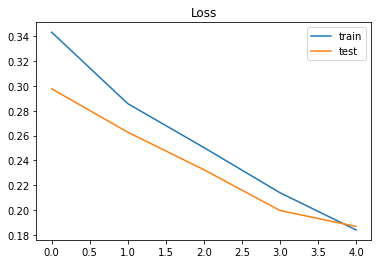

In [79]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

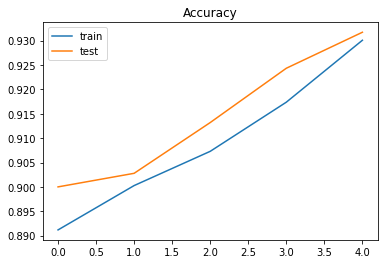

In [81]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [0]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])